173422
14560


6     JOHN J FORD
7     JOHN J FORD
8     JOHN J FORD
46    JOHN J FORD
69    JOHN J FORD
Name: supervisor_name, dtype: object

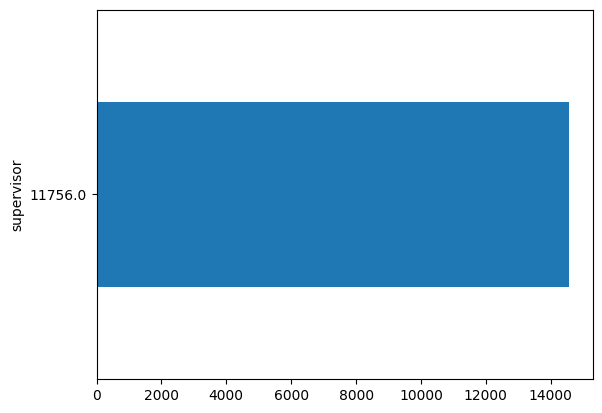

In [24]:
import pandas as pd
import geopandas 
#import geopy
import matplotlib as plt
df = pd.read_csv('boston-police-department-fio.csv')
df2 = pd.read_csv('fieldcontactforpublic2015.csv')
df2_name = pd.read_csv('fieldcontactnameforpublic2015.csv')
df3 = pd.read_csv('mark43_fieldcontacts_for_public_20192.csv')
#df2.merge(df2_name, how="outer", right_on=["fc_num"], left_on=["fc_num"])
df2_full = pd.concat([df2, df2_name], axis=0)
#print(df2_full.columns)
#print(df.columns)
#print(df2.columns)
#print(df3.columns)
#print(df['DESCRIPTION'])
#print(df2_full.head(10))
df.columns = [x.lower() for x in df.columns]
df['location'] = df['location'].str.replace('\d+', '')
df = df.drop('description', axis=1)

df = df.rename(columns={"fio_id": "fc_num", "fio_date": 'contact_date', "clothing": "otherclothing", "veh_make": "vehicle_make", "veh_year_num": "vehicle_year", "veh_state": "vehicle_state", "fiofs_reason": "contact_reason", "race_desc": "race", "location": "streetaddr", "veh_color": "vehicle_color", "veh_color": "vehicle_color", "veh_model": "vehicle_model", "supervisor": "supervisor_name", "supervisor_id": "supervisor", "officer": "officer_name", "officer_id": "officer", "stop_reasons": "contact_reasons", "age_at_fio_corrected": "age"})
df_test = pd.concat([df, df2_full], axis=0)
y = df_test.groupby("supervisor")["fc_num"].count().mean()
z = df_test.groupby("supervisor")["fc_num"].count().std()
print(len(df_test))
print(len(df_test.groupby("supervisor").filter(lambda x: len(x) > int(y) + 7.99*z)))
df_test.groupby("supervisor").filter(lambda x: len(x) > int(y) + 7.99*z)["supervisor"].value_counts().plot(kind='barh')
df_test[df_test["supervisor"] == 11756]["supervisor_name"].head()
